In this module, we study support vector machines (SVMs).  The SVM method is not only used in traditional data science projects but also in natural language processing problems as well. SVM are usually used in classification problems, but later the regression version becomes also available. An support vector classifier is a kind of large-margin classifier: it is a machine learning method based on vector space where the goal is to find a decision boundary between two classes that is maximally far from any point in the training data (possibly discounting some points as outliers or noise). The support vector machines algorithms have not only been used in classification and regression but also in outlier detection. In this lecture, our main focus is classification so we will building a support vector classifier (SVC). We will also introduce the support vector regreesion (SVR) in addition to the usual classification tasks. 

The advantages of support vector machines are:
   - effective in high dimensional spaces;
   - effective in cases where number of dimensions is greater than the number of samples;
   - uses a subset of training points in the decision function (called support vectors), so it is also memory efficient;
   - versatile, that is, different kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
   
The disadvantages include:
   - if the number of features is much greater than the number of samples, avoid over-fitting in choosing kernel functions and regularization term is crucial;
   - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import datasets
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

%matplotlib inline

We'll use the built-in breast cancer dataset from the 'sklearn' library. This is the same dataset we used when we studied PCA. Remember this dataset after initial loading is a dictionary-like object. We need to first convert it into a traditional 'DataFrame' object:

In [2]:
os.chdir("C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets")

In [3]:
cancer = load_breast_cancer()
print(cancer.keys())
print(type(cancer))
cancer['feature_names']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
<class 'sklearn.utils.Bunch'>


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [4]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The response variables are in the 'target' attributes. As you see, these are arrays so we need to convert them to 'DataFrame' objects as well. This is a binary response set, which indicates wheather the tumor is malignant or benigh:

In [6]:
print(cancer['target'])
print(cancer['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.tail(8)

,Cancer
561,1
562,0
563,0
564,0
565,0
566,0
567,0
568,1


Since this dataset is not that intuitive to understand (unless one has some domain knowledge on cancer research), we will skip the EDA for now and jump directly into the machine learning section. Now let's do test-train splits:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, np.ravel(df_target), test_size=0.30, random_state=101) # np.ravel() returns a contiguous flattened array  
print(type(X_train)) # this is a DataFrame object
print(type(y_train)) # this is a numpy array
print(X_train[0:3])
print(y_train[0:3])

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
178        13.01         22.22           82.01      526.4          0.06251   
421        14.69         13.98           98.22      656.1          0.10310   
57         14.71         21.59           95.55      656.9          0.11370   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
178           0.01938        0.001595             0.001852         0.1395   
421           0.18360        0.145000             0.063000         0.2086   
57            0.13650        0.129300             0.081230         0.2027   

     mean fractal dimension           ...             worst radius  \
178                 0.05234           ...                    14.00   
421                 0.07406           ...                    16.46   
57                  0.06758           ...                    17.87   

     worst texture  worst perimeter

Now let's set up the model as our initial attempt.

In [9]:
model = SVC() # SVC() is used for classification whereas SVR() is used for support vector regression
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



C:\Users\pgao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After examining the result, you immediately see a problem here: pretty much everything is classified as 1 in our model. This is due to the fact that the hyperparameters of the SVM are not fine-tuned. Before we play with the hyperparameter, let's first understand the math behind SVC. The mathematical formulation of SVC() is described below:

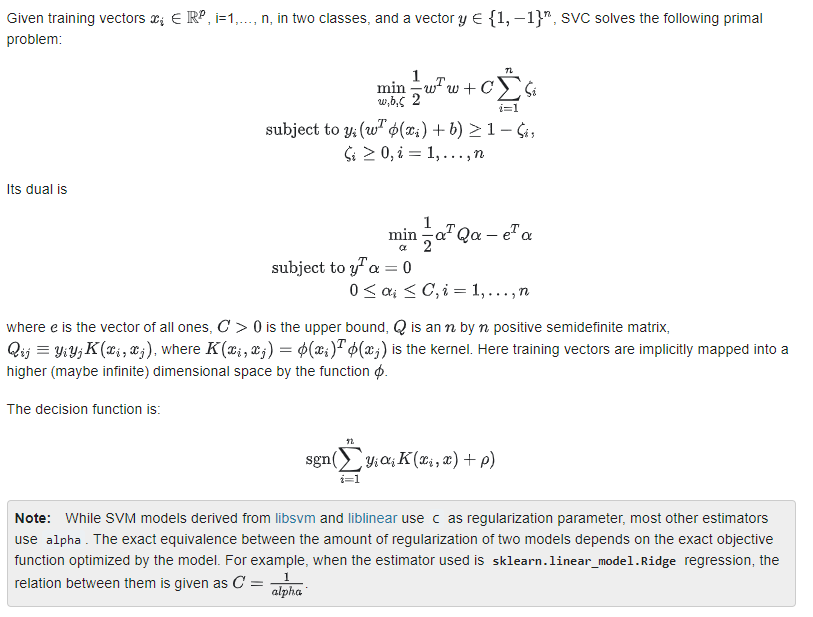

In [10]:
from IPython.display import Image
Image("SVC_Math.PNG") 

Finding the right hyperparameters is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! Before we jump into any discussion, let's understand the nature of these hyperparameters first. Take the case when we are using the radial based kernel function (RBF), two parameters must be considered: 'C' and 'gamma'. The parameter 'C', common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low value of 'C' makes the decision surface smooth, while a high 'C' aims at classifying all training examples correctly (so high value of 'C' makes the decision boundary more jagged in the training data. This implies a larger 'C' value gives a low bias and high variance model whereas a small 'C' value gives a high bias and low variance model. Put another way, for larger values of 'C', a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower 'C' will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. Essentially, 'C' behaves as a regularization parameter in the SVM. 

The 'gamma' parameter defines how much influence a single training example has. The larger 'gamma' is, the closer other examples must be to be affected. The 'gamma' parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. In many scenarios, when 'gamma' is very small, the model is too constrained and cannot capture the complexity or 'shape' of the data.

Because of the difficulties of picking two parameters simultaneously and the inevitable memory requirement for SVM, the idea of creating a 'grid' of parameters and just trying out all the possible combinations seems a viable option, and the algorithm is called a grid search, which is common enough that Scikit-learn has this functionality built in with the GridSearchCV() function. The CV stands for cross-validation, and the GridSearchCV() takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [11]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3, cv=10) # 'refit' is defaulted to be 'True' 
print(type(grid))
grid

<class 'sklearn.model_selection._search.GridSearchCV'>


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

The GridSearchCV() function performs exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. In this function, the 'Refit' argument controls whether we refit an estimator using the best found parameters on the whole dataset. The argument 'verbose' controls the log. The higher the number is, the more verbose the log becomes.

In [12]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ........................

[CV]  C=1, gamma=0.1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf ........................

[CV]  C=10, gamma=0.01, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.6410256410256411, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.8536585365853658, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.8780487804878049, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ..........

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.926829268292683, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9024390243902439, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.875, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ...... C=100, gamma=0.0001, kernel=rbf, score=0.95, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9487179487179487, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

The commands above are a bit complicated. What the fit() does is a bit more involved than usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit() again on all data passed to fit() (without cross-validation) to build a single new model using the best parameter setting. 

You can inspect the best parameters found by GridSearchCV() by calling its corresponding attribute:

In [13]:
grid.best_params_ # this gives the optimal set of hyperparameters

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Then you can run the prediciton again and evaluate the model:

In [14]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.94      0.89      0.91        66
          1       0.94      0.96      0.95       105

avg / total       0.94      0.94      0.94       171



Here are a few comments we want to make. First, to implement the support vector classifiers, the 'sklearn' library provides more than one methods. For example, besides the most standard SVC() method, the library also offers a linear support vector classifier through LinearSVC(). The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences: first, LinearSVC() minimizes the squared hinge loss while SVC() minimizes the regular hinge loss. Second, LinearSVC() uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC() uses the One-vs-One multiclass reduction. Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

We now do a plot of the SVC() function using the training data for visualization purpose. For simplicity, we do a 2-dimensional plot for our model by selecting the first 2 features:

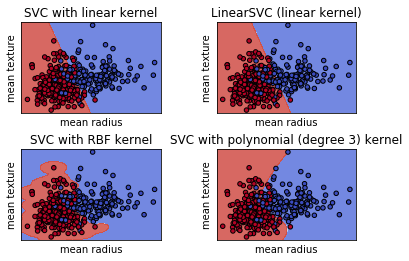

In [15]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = X_train.values[:, :2] # taking the first two features
y = y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('mean radius')
    ax.set_ylabel('mean texture')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

A cautionary note here: while plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems. 

We now introduce a variant of the support vector classifier with weighted samples. This is often the case in unbalanced problems where it is desired to give more importance to certain classes or certain individual samples. In such scenarios, the arguments 'class_weight' and 'sample_weight' can be used. SVC() implements a keyword 'class_weight' in the fit() method. It’s a dictionary of the form {class_label : value}, where value is a floating point number greater than 0 that sets the parameter 'C' of class 'class_label' to 'C\*value'. SVC() and other similar methods implement also weights for individual samples in method fit() through the keyword 'sample_weight'. Similar to 'class_weight', these set the parameter 'C' for the i-th example to 'C\*sample_weight[i]'. Below are some demonstrations of the impact of weights on the decision boundaries:

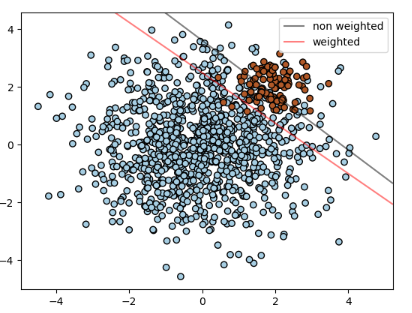

In [16]:
from IPython.display import Image
Image("SVC Weight_1.PNG") 

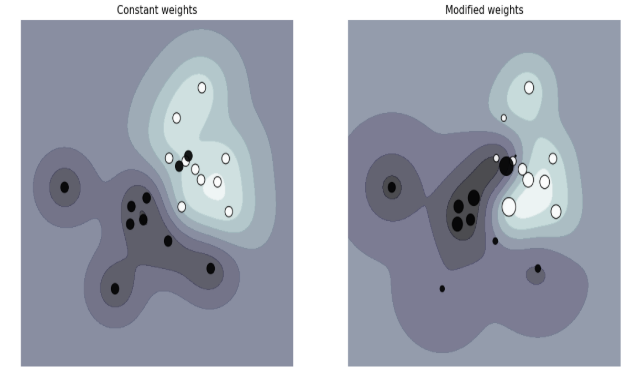

In [17]:
from IPython.display import Image
Image("SVC Weight_2.PNG") 

We now use a simulated example to show how weighting works. In this mini exercise, we plot decision function of a weighted dataset, where the size of points is proportional to its weight. The sample weighting rescales the 'C' parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible.

We use 20 simulated points to do the following exercise (denoted by X and y in the code below)

X:  [[ 2.76405235  1.40015721]
 [ 1.97873798  3.2408932 ]
 [ 2.86755799  0.02272212]
 [ 1.95008842  0.84864279]
 [ 0.89678115  1.4105985 ]
 [ 1.14404357  2.45427351]
 [ 1.76103773  1.12167502]
 [ 1.44386323  1.33367433]
 [ 2.49407907  0.79484174]
 [ 1.3130677   0.14590426]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]]
y:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Equal weight vector (all ones):  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
Sample weight:  [ 1.04855297  1.42001794  1.70627019  1.9507754   0.50965218  0.4380743
  1.25279536  0.77749036  1.61389785  3.1911042   0.89546656  0.3869025
  0.51080514  1.18063218  0.02818223  2.14165935  0.33258611  1.51235949
  3.17161047  1.81370583]


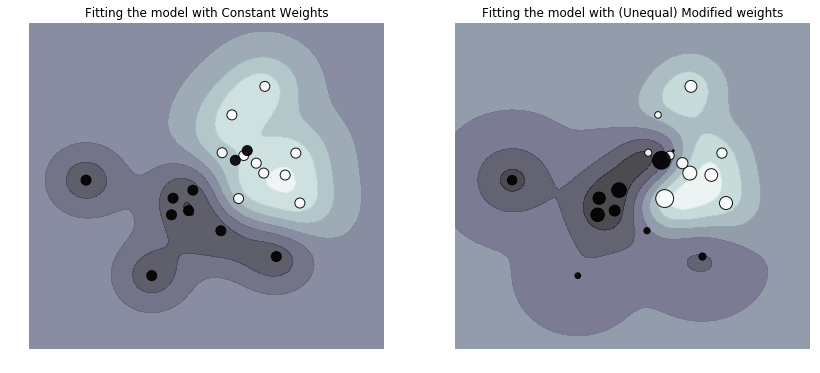

In [25]:
np.random.seed(0) 
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)] # creating 20 pseudo points
y = [1]*10+[-1]*10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
sample_weight_last_ten[15:] *= 5 # adding bigger weights to some outliers
sample_weight_last_ten[9] *= 15

print('X: ', X)
print('y: ', y)
print('Equal weight vector (all ones): ', sample_weight_constant)
print('Sample weight: ', sample_weight_last_ten)

def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)


clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten) # fitting the model with weights

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y) # fitting the model without weights

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Fitting the model with Constant Weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Fitting the model with (Unequal) Modified weights")
plt.show()

Lastly we turn to support vector regressions. The model produced by support vector classification aforementioned depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by support vector regression (SVR) depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

There are more than one implementations of SVR. The most standard is SVR(). The LinearSVR() provides a faster implementation than SVR() but only considers linear kernels. As with classification classes, the fit() method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values. Below is a simulated example:

In [28]:
X = [[0, 0], [2, 2], [-1,1], [2,3.4], [1,-0.3]]
y = [0.5, 2.5, 0.9, 1.4, 4]
clf = svm.SVR()
clf.fit(X, y) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
clf.predict([[1, 1]])

array([ 2.00093056])

The math behind the SVR is given here:

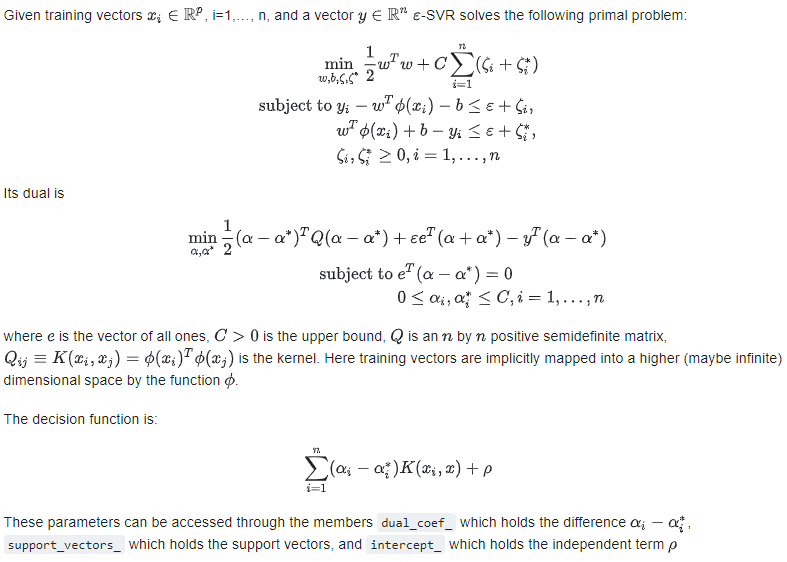

In [29]:
from IPython.display import Image
Image("SVR_Math.PNG") 

Lastly, let's visualize SVR using some simluated data in the one-variable setting. We now run a SVR model using linear, polynomial and RBF kernels:

Sample Data X: 
 [[ 0.35223593]
 [ 0.5690832 ]
 [ 0.6052994 ]
 [ 0.66407499]
 [ 1.14131805]
 [ 1.20772843]
 [ 1.28616743]
 [ 1.56376648]
 [ 1.62202432]
 [ 1.79053738]
 [ 1.81580629]
 [ 1.84051201]
 [ 1.8712229 ]
 [ 1.90364622]
 [ 1.90879904]
 [ 1.92618709]
 [ 1.98766746]
 [ 2.13917189]
 [ 2.2357192 ]
 [ 2.24541714]
 [ 2.44754664]
 [ 2.48838989]
 [ 2.51966806]
 [ 3.15562771]
 [ 3.16965478]
 [ 3.40057769]
 [ 3.4178648 ]
 [ 3.48570808]
 [ 3.6911329 ]
 [ 3.6934133 ]
 [ 3.97767373]
 [ 4.00918075]
 [ 4.11279726]
 [ 4.26970059]
 [ 4.45761339]
 [ 4.48535052]
 [ 4.5836351 ]
 [ 4.63439545]
 [ 4.68642182]
 [ 4.84451521]]
Sample Data y: 
 [ 0.95627015  0.53885997  0.56900831  0.61633097  0.90918312 -0.22307513
  0.95976592  0.99997529  0.99868813  0.97595393  1.41452323  0.96384669
  0.95521034  0.94511501  0.94341886  0.22233958  0.9143603   0.84277646
  0.78696437  0.78094385  0.47356864  0.60773296  0.58260047 -0.01403459
 -0.02805845  0.63934729 -0.27277106 -0.3373641  -0.52229523 -0.5242385
 

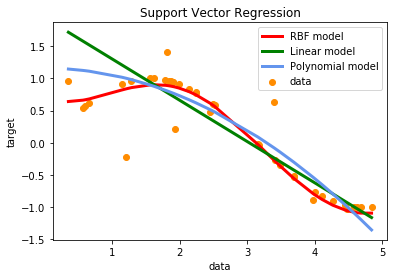

In [37]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8)) # adding some noise to targets
print('Sample Data X: \n', X)
print('Sample Data y: \n', y)


svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 3 # this controls the thickness of the line (higher number implies thicker regression lines)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='red', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='green', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

References:

   - https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-and-machine-learning-on-documents-1.html
   - http://scikit-learn.org/stable/modules/svm.html
   - http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
   - http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
   - https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html#sphx-glr-auto-examples-svm-plot-weighted-samples-py